In [3]:
from __future__ import annotations

import sys
from itertools import product

import pandas as pd
from dask_image.imread import imread
from loguru import logger
from matplotlib.backends.backend_qt5agg import (
    FigureCanvas,
)
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
from napari import Viewer
from napari.layers import Image, Points
from napari.utils.history import (
    get_open_history,
)
from qtpy.QtWidgets import (
    QComboBox,
    QFileDialog,
    QGridLayout,
    QLabel,
    QPushButton,
    QSizePolicy,
    QWidget,
)

from cell_gater.model.data_model import DataModel
from cell_gater.utils.misc import napari_notification

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/jnimoca/Jose_BI/data/mask_expansion_mesmer/quantification/1.csv")

In [5]:
active_marker = "mean_panCK"
active_y_axis = "Area"

In [6]:
x_data = df[active_marker]
y_data = df[active_y_axis]

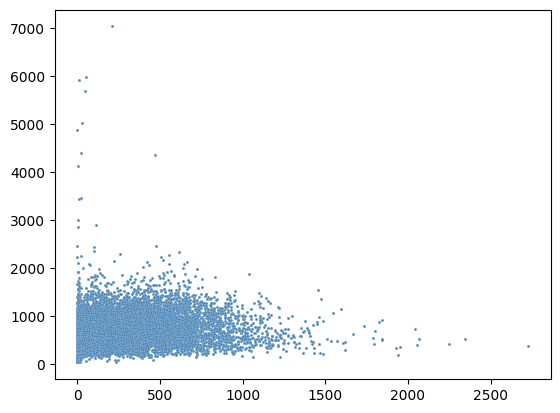

In [7]:
plt.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)

Test 1 passed. Plots scatter plot

# Test 2: Plot scatter plot in log10 space

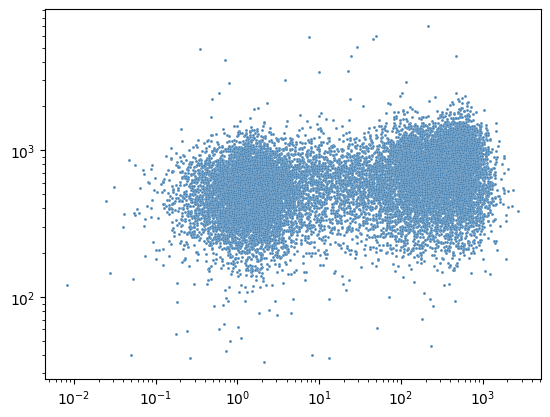

In [12]:
#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

Test 2 passed. Plotted scatter plot in log scale.  
Comments:  
Many values are below 10ˆ0, which means between 0 and 1. This is strange.

# Check df values

In [15]:
df['mean_panCK']

0           0.352700
1           0.617188
2          36.154941
3         616.527682
4        1365.433333
            ...     
18533      40.444162
18534      69.844683
18535      26.543478
18536      24.812656
18537       0.205000
Name: mean_panCK, Length: 18538, dtype: float64

<Axes: >

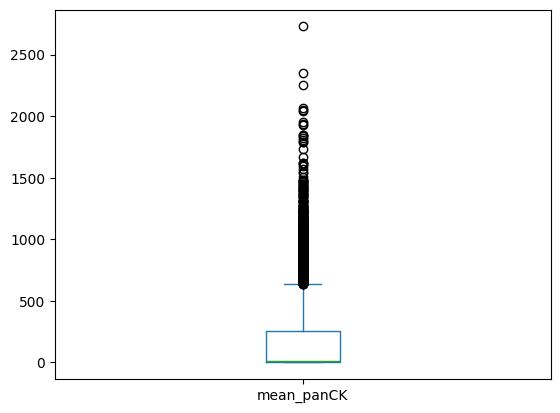

In [14]:
df['mean_panCK'].plot.box()

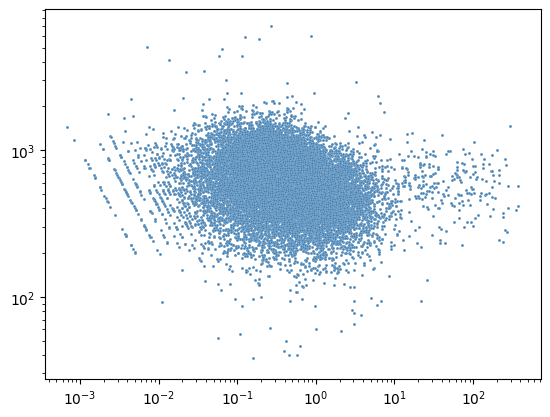

In [18]:
active_marker = "mean_CD4"
active_y_axis = "Area"

x_data = df[active_marker]
y_data = df[active_y_axis]

#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

In [29]:
x_data = x_data + 1

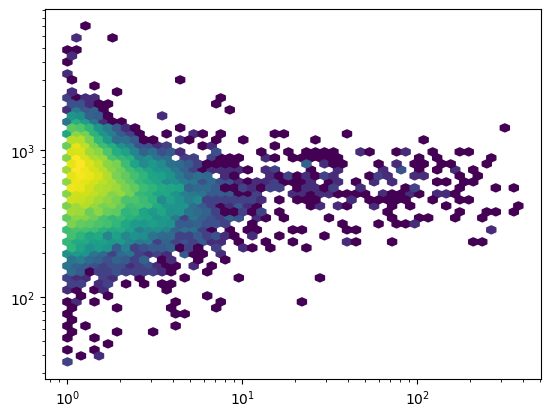

In [39]:
#create axis for plotting
fig, ax = plt.subplots()
ax.hexbin(x=x_data, y=y_data, gridsize=50,
        cmap="viridis", bins="log",
        xscale="log", yscale="log")

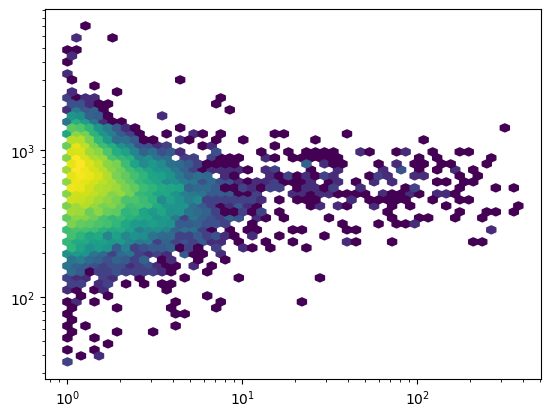

In [37]:
plt.hexbin(x=x_data, y=y_data, gridsize=50,
        cmap="viridis", bins="log",
        xscale="log", yscale="log")

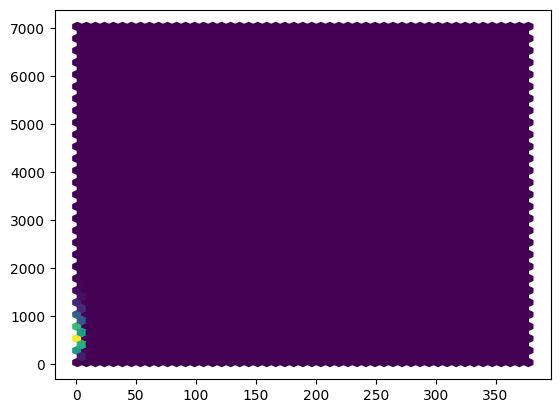

In [38]:
plt.hexbin(x=x_data, y=y_data, gridsize=50,
        cmap="viridis")

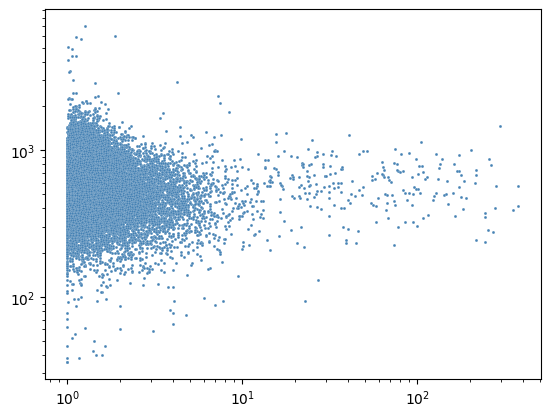

In [32]:
#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

# can i test the slider here?

In [16]:
def get_min_max_median_step(self) -> tuple:
    """Get the min, max, median and step for the slider."""
    df = self.model.regionprops_df
    df = df[df["sample_id"] == self.model.active_sample]
    min = df[self.model.active_marker].min() + 1
    max = df[self.model.active_marker].max()
    init = df[self.model.active_marker].median()
    step = min / 100
    return min, max, init, step

In [17]:
def slider_changed(self, val):
    """Update the current gate value and the vertical line on the scatter plot."""
    self.model._current_gate = val
    self.scatter_canvas.update_vertical_line(val)
    self.scatter_canvas.fig.draw()

## Test vertical line

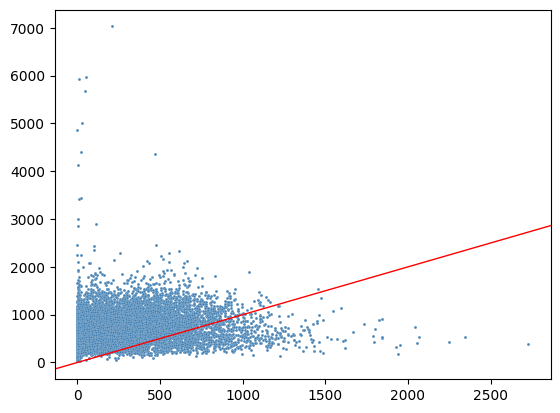

In [14]:
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)

ax.axline(xy1=(0, 0), xy2=(1000,1000), color="red", lw=1)

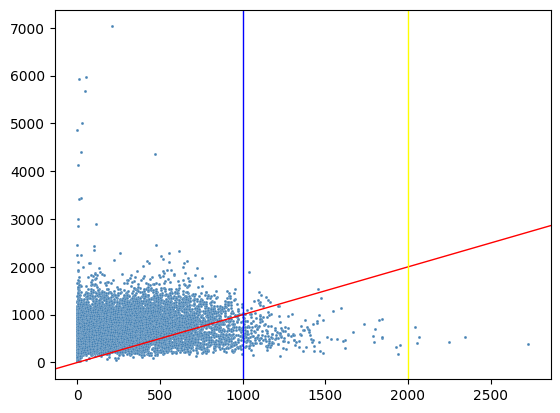

In [16]:
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)

ax.axline(xy1=(0, 0), xy2=(1000,1000), color="red", lw=1)
ax.axline(xy1=(2000, 0), xy2=(2000,1000), color="yellow", lw=1)
ax.axline(xy1=(1000, 0), xy2=(1000,1000), color="blue", lw=1)

3


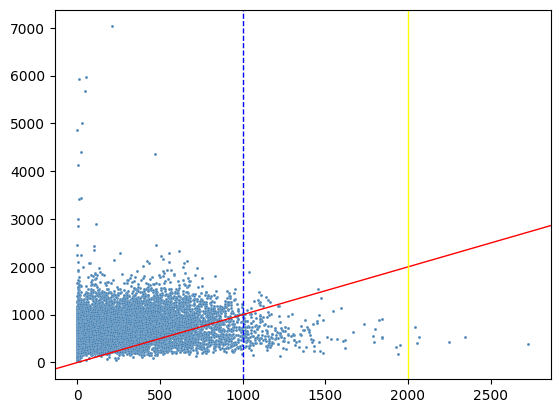

In [10]:
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)

ax.axline(xy1=(0, 0), xy2=(1000,1000), color="red", lw=1)
ax.axline(xy1=(2000, 0), xy2=(2000,1000), color="yellow", lw=1)
ax.axline(xy1=(1000, 0), xy2=(1000,1000), color="blue", lw=1, ls="--")

print(len(ax.lines))

## lines not showing up in log figure

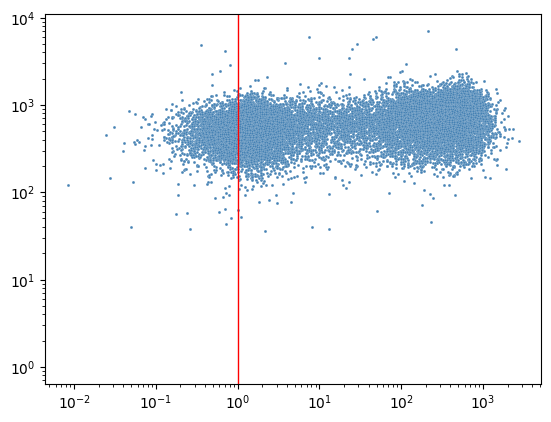

In [28]:
#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

ax.axline(xy1=(1,0), xy2=(1,1), color="red", lw=1)

1


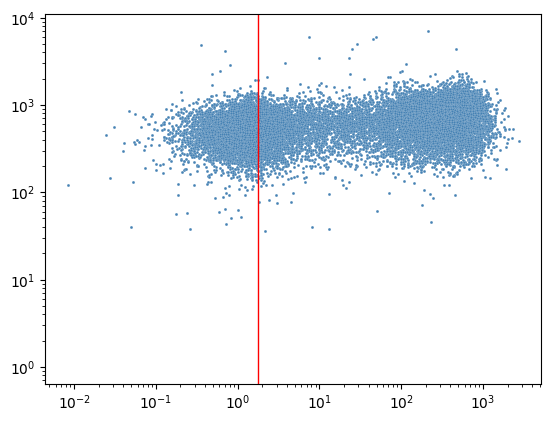

In [9]:
#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

ax.axline(xy1=(1.7801469516291881,0), xy2=(1.7801469516291881,1), color="red", lw=1)

print(len(ax.lines))

In [17]:
y_data.max()

7029.0

Text(1000, 7029.0, ' Plot')

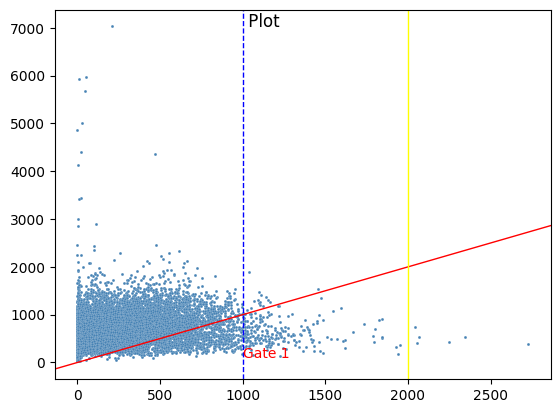

In [22]:
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)

ax.axline(xy1=(0, 0), xy2=(1000,1000), color="red", lw=1)
ax.axline(xy1=(2000, 0), xy2=(2000,1000), color="yellow", lw=1)
ax.axline(xy1=(1000, 0), xy2=(1000,1000), color="blue", lw=1, ls="--")

ax.text(x=1000, y=100, s="Gate 1", color="red")
ax.text(x=1000 , y=y_data.max(), s=f" Plot", fontsize=12)

<Axes.ArtistList of 1 texts>
True


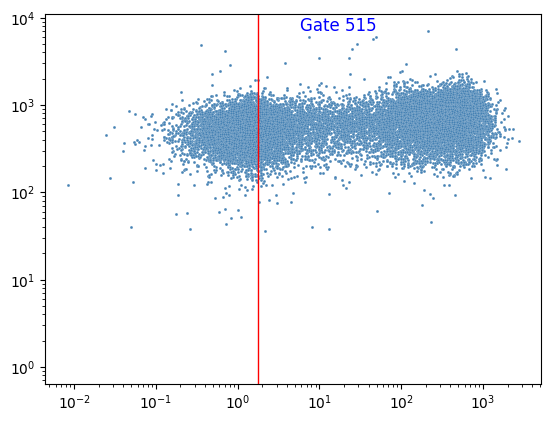

In [33]:
#create axis for plotting
fig, ax = plt.subplots()
ax.scatter(
    x=x_data, y=y_data,
    color="steelblue",
    ec="white",
    lw=0.1, alpha=1.0,
    s=80000 / int(df.shape[0]),
)
ax.set_xscale("log")
ax.set_yscale("log")

ax.axline(xy1=(1.7801469516291881,0), xy2=(1.7801469516291881,1), color="red", lw=1)

ax.text(x=1.7801469516291881, y=y_data.max(), s="Gate 1", color="red")
# ax.text(x=5.7801469516291881, y=y_data.max(), s="Gate 1", color="blue")

print(ax.texts)
ax.texts[0].set_text("Gate 515")
ax.texts[0].set_color("blue")
ax.texts[0].set_fontsize(12)
ax.texts[0].set_position((5.7801469516291881, y_data.max()))

if len(ax.texts) > 0 :
    print("True")